In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go

In [4]:
data = pd.read_csv('E://Ginu_StudyMaterials//Sem2//Dissertation//MapData//PRP.csv')

In [5]:
data

,date_of_sale,address,postal_code,county,price,market_price,VAT_exclusive,property_description,property_size_description,province,month_year,year,month
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,2010-01,2010,1
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,Leinster,2010-03,2010,1
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,2010-04,2010,1
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,2010-04,2010,1
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,2010-04,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516581,28/01/2022,"LACKEN, MULTYFARNHAM, MULLINGAR",NaN,Westmeath,305000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,2022-01,2022,1
516582,28/01/2022,"LARCH HILL, COLMAN, FETHARD",NaN,Tipperary,300000,No,No,Second-Hand Dwelling house /Apartment,NaN,Munster,2022-01,2022,1
516583,28/01/2022,"SHERRYS WOOD, BELLEWSTOWN, CO MEATH",NaN,Meath,450000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,2022-01,2022,1
516584,28/01/2022,"ST JUDES, STONEYFORD, KILKENNY",NaN,Kilkenny,242000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,2022-01,2022,1


In [6]:
counties = data['county'].unique()
counties

array(['Dublin', 'Laois', 'Meath', 'Kilkenny', 'Limerick', 'Carlow',
       'Cork', 'Clare', 'Sligo', 'Cavan', 'Tipperary', 'Wicklow',
       'Roscommon', 'Wexford', 'Mayo', 'Donegal', 'Longford', 'Galway',
       'Offaly', 'Kildare', 'Waterford', 'Louth', 'Kerry', 'Westmeath',
       'Monaghan', 'Leitrim'], dtype=object)

In [7]:
median_per_county = [data['price'][data['county']==county].median() for county in counties]

median_per_county = np.asarray(median_per_county)
median_per_county

array([308370., 139995., 233480., 160000., 150000., 140000., 200000.,
       140000., 110000., 104225., 125000., 275000.,  89000., 150000.,
       110000., 101743.,  84000., 180000., 130000., 250000., 142000.,
       170000., 142500., 138000., 118000.,  87000.])

In [8]:
q=[]
for price in median_per_county:
    x = price/10**3
    q.append(x)

In [9]:
county_price = pd.DataFrame(q)

In [10]:
county_price['county'] = counties

In [11]:
county_price.rename(columns={0:'price'},inplace=True)

In [12]:
from opencage.geocoder import OpenCageGeocode
key = '40d783cbf75143b48b8528d1804a3ccd'  # get api key from:  https://opencagedata.com

geocoder = OpenCageGeocode(key)

In [13]:
list_lat = []   # create empty lists

list_long = []

for index, row in county_price.iterrows(): # iterate over rows in dataframe


    City = row['county']
    #State = row['province']       
    query = str(City)
    #loc = row['temp_add']     
    #query = str(loc)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

# create new columns from lists    

county_price['lat'] = list_lat   

county_price['lon'] = list_long

In [14]:
county_price

,price,county,lat,lon
0,308.370,Dublin,53.349764,-6.260273
1,139.995,Laois,52.998458,-7.398034
2,233.480,Meath,53.649784,-6.588529
3,160.000,Kilkenny,52.651022,-7.248495
4,150.000,Limerick,52.661252,-8.630124
5,140.000,Carlow,52.690789,-6.825145
6,200.000,Cork,51.897077,-8.465467
7,140.000,Clare,52.857258,-8.937436
8,110.000,Sligo,54.192986,-8.730543
9,104.225,Cavan,48.672173,-3.345742


In [15]:
data1 = gpd.read_file('E://Ginu_StudyMaterials//Sem2//Dissertation//MapData//IRL_adm1.shp')
#pd.read_csv('E://Ginu_StudyMaterials//Sem2//Dissertation//MapData//IRL_roads.shp', encoding = 'unicode_escape')

In [16]:
data1

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,109,IRL,Ireland,1,Carlow,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730..."
1,109,IRL,Ireland,2,Cavan,Administrative County,County,None,An Cabhán,"POLYGON ((-7.27517 53.78388, -7.27538 53.78377..."
2,109,IRL,Ireland,3,Clare,Administrative County,County,None,An Clár,"MULTIPOLYGON (((-9.04528 52.71819, -9.04528 52..."
3,109,IRL,Ireland,4,Cork,Traditional County,County,None,Corcaigh,"MULTIPOLYGON (((-10.16361 51.57986, -10.16528 ..."
4,109,IRL,Ireland,5,Donegal,Administrative County,County,None,Dún na nGall|Tyrconnel,"MULTIPOLYGON (((-7.24083 55.44958, -7.24078 55..."
5,109,IRL,Ireland,6,Dublin,Administrative County,County,None,Baile Átha Cliath,"MULTIPOLYGON (((-6.04858 53.37128, -6.04919 53..."
6,109,IRL,Ireland,7,Galway,Traditional County,County,None,Gaillimh,"MULTIPOLYGON (((-9.59750 53.34375, -9.59750 53..."
7,109,IRL,Ireland,8,Kerry,Administrative County,County,None,Ciarraí,"MULTIPOLYGON (((-10.21028 51.99903, -10.20972 ..."
8,109,IRL,Ireland,9,Kildare,Administrative County,County,None,Cill Dara,"POLYGON ((-6.46413 53.22897, -6.46419 53.22890..."
9,109,IRL,Ireland,10,Kilkenny,Administrative County,County,None,Cill Chainnigh,"POLYGON ((-6.91620 52.44627, -6.91668 52.44429..."


In [19]:
data1.rename({'NAME_1':'county' }, axis=1, inplace=True)

In [20]:

data1['county'] = data1['county'].replace(['Laoighis'],['Laois'])

In [21]:
data1['county'].unique()

array(['Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Galway',
       'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick',
       'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan', 'Offaly',
       'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Westmeath',
       'Wexford', 'Wicklow'], dtype=object)

In [22]:
df_merge_col = pd.merge(county_price, data1, on='county', how='left')

df_merge_col

,price,county,lat,lon,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,308.370,Dublin,53.349764,-6.260273,109,IRL,Ireland,6,Administrative County,County,None,Baile Átha Cliath,"MULTIPOLYGON (((-6.04858 53.37128, -6.04919 53..."
1,139.995,Laois,52.998458,-7.398034,109,IRL,Ireland,11,Administrative County,County,None,Laois|Leix|Queens,"POLYGON ((-7.64934 52.79081, -7.66340 52.80828..."
2,233.480,Meath,53.649784,-6.588529,109,IRL,Ireland,17,Administrative County,County,None,An Mhí,"POLYGON ((-7.03209 53.51403, -7.01779 53.52950..."
3,160.000,Kilkenny,52.651022,-7.248495,109,IRL,Ireland,10,Administrative County,County,None,Cill Chainnigh,"POLYGON ((-6.91620 52.44627, -6.91668 52.44429..."
4,150.000,Limerick,52.661252,-8.630124,109,IRL,Ireland,13,Traditional County,County,None,Luimneach,"MULTIPOLYGON (((-9.06639 52.63486, -9.06694 52..."
5,140.000,Carlow,52.690789,-6.825145,109,IRL,Ireland,1,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730..."
6,200.000,Cork,51.897077,-8.465467,109,IRL,Ireland,4,Traditional County,County,None,Corcaigh,"MULTIPOLYGON (((-10.16361 51.57986, -10.16528 ..."
7,140.000,Clare,52.857258,-8.937436,109,IRL,Ireland,3,Administrative County,County,None,An Clár,"MULTIPOLYGON (((-9.04528 52.71819, -9.04528 52..."
8,110.000,Sligo,54.192986,-8.730543,109,IRL,Ireland,21,Administrative County,County,None,Sligeach,"MULTIPOLYGON (((-9.05908 54.27736, -9.05917 54..."
9,104.225,Cavan,48.672173,-3.345742,109,IRL,Ireland,2,Administrative County,County,None,An Cabhán,"POLYGON ((-7.27517 53.78388, -7.27538 53.78377..."


In [23]:
df_merge_col =df_merge_col[['price', 'county' , 'geometry', 'ID_1']]

In [24]:
df_merge_col = df_merge_col.dropna(subset=['price', 'geometry']).set_index('ID_1')
df_merge_col

,price,county,geometry
ID_1,,,
6,308.370,Dublin,"MULTIPOLYGON (((-6.04858 53.37128, -6.04919 53..."
11,139.995,Laois,"POLYGON ((-7.64934 52.79081, -7.66340 52.80828..."
17,233.480,Meath,"POLYGON ((-7.03209 53.51403, -7.01779 53.52950..."
10,160.000,Kilkenny,"POLYGON ((-6.91620 52.44627, -6.91668 52.44429..."
13,150.000,Limerick,"MULTIPOLYGON (((-9.06639 52.63486, -9.06694 52..."
1,140.000,Carlow,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730..."
4,200.000,Cork,"MULTIPOLYGON (((-10.16361 51.57986, -10.16528 ..."
3,140.000,Clare,"MULTIPOLYGON (((-9.04528 52.71819, -9.04528 52..."
21,110.000,Sligo,"MULTIPOLYGON (((-9.05908 54.27736, -9.05917 54..."


In [25]:
from geopandas import GeoDataFrame

df_merge_col = GeoDataFrame(df_merge_col)

(-10.896526646614074, -5.76013867855072, 51.218040657043574, 55.65195827484136)

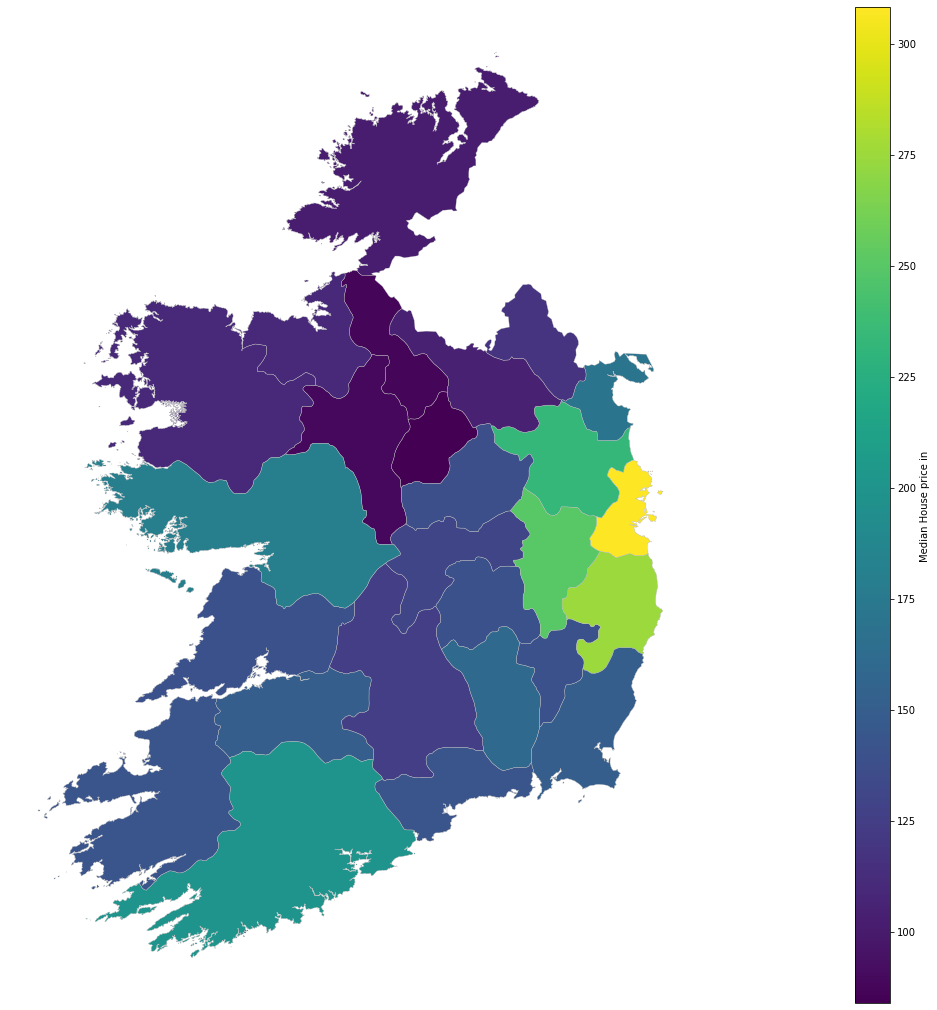

In [26]:
# OPTIONAL: Display using geopandas
fig, ax = plt.subplots(1,1, figsize=(20,20))
divider = make_axes_locatable(ax)
tmp = df_merge_col.copy()
#tmp['price'] = tmp['price']*100 #To display percentages
cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
tmp.plot(column='price', ax=ax,cax=cax,  legend=True, 
         legend_kwds={'label': "Median House price in "})

tmp.geometry.boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) #Add some borders to the geometries
ax.axis('off')

C:\Users\35385\anaconda3\lib\site-packages\geopandas\plotting.py:627: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


(-10.896526646614074, -5.76013867855072, 51.218040657043574, 55.65195827484136)

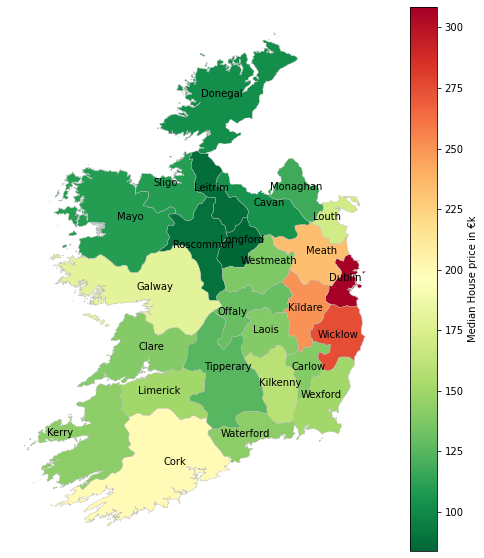

In [27]:
# OPTIONAL: Display using geopandas

tmp = df_merge_col.copy()
tmp['coords'] = tmp['geometry'].apply(lambda x: x.representative_point().coords[:])
tmp['coords']= [coords[0] for coords in tmp['coords']]

fig, ax = plt.subplots(1,1, figsize=(10,10))
#divider = make_axes_locatable(ax)

#tmp['price'] = tmp['price']*100 #To display percentages
#cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
tmp.plot(column='price', ax=ax,  legend=True, colormap = 'RdYlGn_r',
         legend_kwds={'label': "Median House price in €k"})

for idx, row in tmp.iterrows():
   plt.annotate(text=row['county'], xy=row['coords'], horizontalalignment='center', color='black')

tmp.geometry.boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) #Add some borders to the geometries
ax.axis('off')

In [23]:
import adjustText as aT

In [24]:
tmp1 = df_merge_col.copy()

tmp1["rep"] = tmp1["geometry"].representative_point()
za_points = tmp1.copy()
za_points.set_geometry("rep", inplace = True)

1

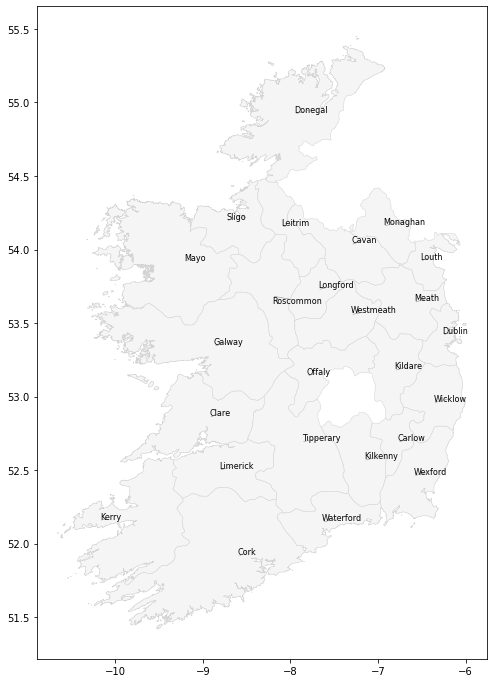

In [25]:
ax = tmp1.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["county"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

In [26]:
data_dub = pd.read_csv('E://Ginu_StudyMaterials//Sem2//Dissertation//Data//PRP_Dublin.csv')

In [27]:
codes = data['postal_code'].unique()
codes

array([nan, 'Dublin 14', 'Dublin 2', 'Dublin 13', 'Dublin 12', 'Dublin 4',
       'Dublin 11', 'Dublin 9', 'Dublin 24', 'Dublin 15', 'Dublin 22',
       'Dublin 5', 'Dublin 18', 'Dublin 6', 'Dublin 6w', 'Dublin 7',
       'Dublin 16', 'Dublin 8', 'Dublin 3', 'Dublin 1', 'Dublin 17',
       'Dublin 20', 'Dublin 10'], dtype=object)

In [28]:
median_per_county = [data['price'][data['postal_code']==postal_code].median() for postal_code in codes]

median_per_county = np.asarray(median_per_county)
median_per_county

array([     nan, 495000. , 333000. , 315000. , 280000. , 480000. ,
       204000. , 330000. , 250000. , 274669.5, 225000. , 335000. ,
       380000. , 535000. , 475800. , 285250. , 425000. , 259456. ,
       354500. , 237000. , 196000. , 262000. , 170000. ])

In [29]:
q=[]
for price in median_per_county:
    x = price/10**3
    q.append(x)

In [30]:
county_price = pd.DataFrame(q)

In [31]:
county_price['postal_code'] = codes

In [32]:
county_price['county'] = "Dublin"

In [33]:
county_price.rename(columns={0:'price'},inplace=True)

In [34]:
county_price.dropna()

,price,postal_code,county
1,495.0000,Dublin 14,Dublin
2,333.0000,Dublin 2,Dublin
3,315.0000,Dublin 13,Dublin
4,280.0000,Dublin 12,Dublin
5,480.0000,Dublin 4,Dublin
6,204.0000,Dublin 11,Dublin
7,330.0000,Dublin 9,Dublin
8,250.0000,Dublin 24,Dublin
9,274.6695,Dublin 15,Dublin
10,225.0000,Dublin 22,Dublin


In [35]:
county_price['postal_code'] = county_price['postal_code'].replace(['Dublin 6w'],['Dublin 6W'])

In [36]:
data1 = gpd.read_file('E://Ginu_StudyMaterials//Sem2//Dissertation//MapData//dublin_postcodes//Postcode_dissolve.shp')

In [37]:
data1

,Yelp_postc,geometry
0,Dublin 1,"POLYGON ((316956.134 235998.134, 317010.169 23..."
1,Dublin 10,"POLYGON ((309782.544 234202.191, 309808.724 23..."
2,Dublin 11,"POLYGON ((310163.675 245333.645, 310213.215 24..."
3,Dublin 12,"POLYGON ((313179.907 230983.889, 313217.891 23..."
4,Dublin 13,"MULTIPOLYGON (((324073.470 241251.565, 324112...."
5,Dublin 14,"POLYGON ((317420.557 230644.051, 317427.114 23..."
6,Dublin 15,"POLYGON ((305414.820 242509.687, 305493.402 24..."
7,Dublin 16,"POLYGON ((312682.400 227779.478, 312686.689 22..."
8,Dublin 17,"POLYGON ((322212.089 241140.723, 322203.651 24..."
9,Dublin 18,"POLYGON ((320085.236 226289.150, 320069.927 22..."


In [38]:
data1.rename({'Yelp_postc':'postal_code' }, axis=1, inplace=True)

In [39]:
df_merge = pd.merge(county_price, data1, on='postal_code', how='left')

df_merged = df_merge.copy()

In [40]:
df_merged =df_merged[['price', 'county' ,'postal_code', 'geometry']]

In [41]:
df_merged.dropna()

,price,county,postal_code,geometry
1,495.0000,Dublin,Dublin 14,"POLYGON ((317420.557 230644.051, 317427.114 23..."
2,333.0000,Dublin,Dublin 2,"POLYGON ((315452.278 232444.163, 315386.068 23..."
3,315.0000,Dublin,Dublin 13,"MULTIPOLYGON (((324073.470 241251.565, 324112...."
4,280.0000,Dublin,Dublin 12,"POLYGON ((313179.907 230983.889, 313217.891 23..."
5,480.0000,Dublin,Dublin 4,"POLYGON ((318707.918 234038.963, 318784.900 23..."
6,204.0000,Dublin,Dublin 11,"POLYGON ((310163.675 245333.645, 310213.215 24..."
7,330.0000,Dublin,Dublin 9,"POLYGON ((317692.522 241579.902, 317741.187 24..."
8,250.0000,Dublin,Dublin 24,"POLYGON ((308642.704 230930.203, 309121.958 23..."
9,274.6695,Dublin,Dublin 15,"POLYGON ((305414.820 242509.687, 305493.402 24..."
10,225.0000,Dublin,Dublin 22,"POLYGON ((305875.927 236192.165, 305896.985 23..."


In [42]:
#df_merged = df_merged.dropna(subset=['price', 'geometry']).set_index()
#df_merged

In [43]:
from geopandas import GeoDataFrame

df_merged = GeoDataFrame(df_merged)

In [44]:
df_merged1 = df_merged.dropna()

(295315.0962572824, 331878.1806627306, 213883.70210066572, 248701.77545546932)

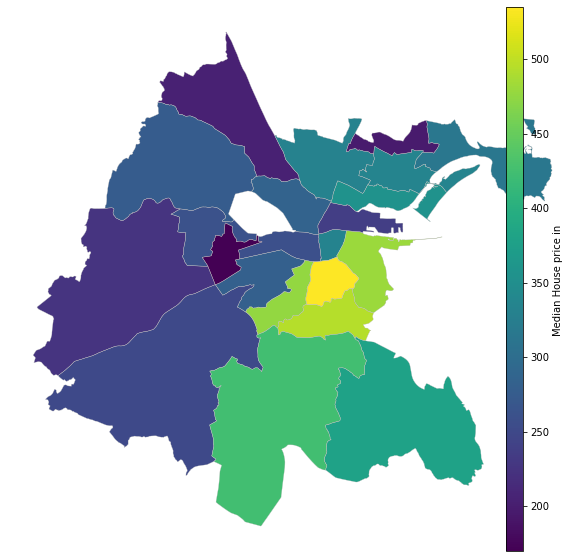

In [45]:
# OPTIONAL: Display using geopandas
fig, ax = plt.subplots(1,1, figsize=(10,10))
divider = make_axes_locatable(ax)
tmp = df_merged.copy()
#tmp['price'] = tmp['price']*100 #To display percentages
cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
tmp.plot(column='price', ax=ax,cax=cax,  legend=True, 
         legend_kwds={'label': "Median House price in "})

tmp.geometry.boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) #Add some borders to the geometries
ax.axis('off')

C:\Users\35385\anaconda3\lib\site-packages\geopandas\plotting.py:627: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


(295315.0962572824, 331878.1806627306, 213883.70210066572, 248701.77545546932)

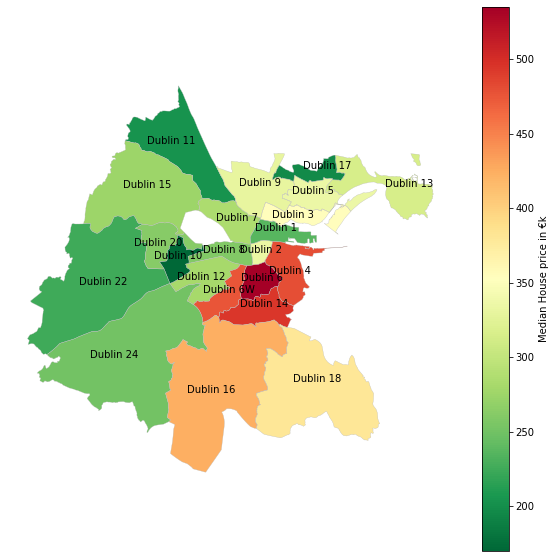

In [48]:
# OPTIONAL: Display using geopandas
from matplotlib import cm
#from colorspacious import cspace_converter


tmp = df_merged1.copy()
#tmp["geometry"] = tmp["geometry"].centroid
tmp['coords'] = tmp['geometry'].apply(lambda x: x.representative_point().coords[:])
tmp['coords']= [coords[0] for coords in tmp['coords']]

fig, ax = plt.subplots(1,1, figsize=(10,10))
#divider = make_axes_locatable(ax)

#tmp['price'] = tmp['price']*100 #To display percentages
#cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
tmp.plot(column='price', ax=ax,  legend=True, colormap = 'RdYlGn_r',
         legend_kwds={'label': "Median House price in €k"})

for idx, row in tmp.iterrows():
   plt.annotate(text=row['postal_code'], xy=row['coords'], horizontalalignment='center', color='black')

tmp.geometry.boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) #Add some borders to the geometries
ax.axis('off')